# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [222]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nhc12\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [223]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [224]:
# Create a newsapi client
from newsapi import NewsApiClient

In [225]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [226]:
# Fetch the Bitcoin news articles
Bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
# Print total articles
print(f"Total articles about Bitcoin: {Bitcoin_headlines['totalResults']}")

# Show sample article
Bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 10133


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Arielle Pardes',
 'title': 'Miami’s Bitcoin Conference Left a Trail of Harassment',
 'description': 'For some women, inappropriate conduct from other conference-goers continued to haunt them online.',
 'url': 'https://www.wired.com/story/bitcoin-2022-conference-harassment/',
 'urlToImage': 'https://media.wired.com/photos/627a89e3e37e715cb7d760d2/191:100/w_1280,c_limit/Bitcoin_Miami_Biz_GettyImages-1239817123.jpg',
 'publishedAt': '2022-05-10T16:59:46Z',
 'content': 'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]'}

In [227]:
# Fetch the Ethereum news articles
Ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
# Print total articles
print(f"Total articles about Ethereum: {Ethereum_headlines['totalResults']}")

# Show sample article
Ethereum_headlines["articles"][0]

Total articles about Ethereum: 4825


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': "Here's what NFTs look like on Instagram",
 'description': "Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital wallet and posting for the world to see. If you like, the social …",
 'url': 'https://www.engadget.com/instagram-nft-details-131020868.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2022-05/2546c160-d05e-11ec-b75e-e45eaa8c5b2b',
 'publishedAt': '2022-05-10T13:10:20Z',
 'content': "Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars]"}

In [228]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
3,2022-05-16,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833
4,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928


In [229]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
1,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
2,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945
3,2022-04-26,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.000,0.858
4,2022-04-26,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.000,0.935


In [230]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,-0.032063,0.052350,0.060010,0.887650
std,0.430477,0.065516,0.074539,0.091755
min,-0.831600,0.000000,0.000000,0.557000
25%,-0.381800,0.000000,0.000000,0.839500
50%,0.000000,0.018000,0.046500,0.897500
75%,0.323650,0.085000,0.094750,0.951250
max,0.865500,0.263000,0.299000,1.000000


In [231]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.083549,0.077670,0.048950,0.873430
std,0.485607,0.089566,0.061865,0.090786
min,-0.836000,0.000000,0.000000,0.622000
25%,-0.328950,0.000000,0.000000,0.825750
50%,0.000000,0.057500,0.037000,0.881500
75%,0.463275,0.129000,0.075000,0.937000
max,0.952000,0.378000,0.299000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum (0.077670 vs Bitcoin: 0.052350)

Q: Which coin had the highest compound score?

A: Ethereum (max: 0.952000 vs Bitcoin max: 0.865500)

Q. Which coin had the highest positive score?

A: Ethereum (max: 0.378000 vs Bitcoin max: 0.263000)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [232]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [233]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [234]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of stopwords
    stop = stopwords.words('english')
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    output = [word.lower() for word in lem if word.lower() not in stop]
    
    # Remove the stop words
        
    return output

In [235]:
# Create a new tokens column for Bitcoin
Bitcoin_df ['top2'] = Bitcoin_df['text'].apply(tokenizer)
Bitcoin_df

,date,text,compound,positive,negative,neutral,top2
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, womenfocused, crypto, s..."
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,"[bitcoin, mining, site, powered, otherwise, lo..."
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772,"[warren, buffett, ha, always, bitcoin, skeptic..."
3,2022-05-16,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833,"[kid, remember, father, tried, use, broom, han..."
4,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[image, source, getty, imagesthe, value, bitco..."
...,...,...,...,...,...,...,...
95,2022-04-26,Whats happening in the blockchain industry thi...,0.0000,0.000,0.000,1.000,"[whats, happening, blockchain, industry, year,..."
96,2022-04-26,Whats happening in the blockchain industry thi...,0.0000,0.000,0.000,1.000,"[whats, happening, blockchain, industry, year,..."
97,2022-05-13,A look at the day ahead in markets from Dhara ...,0.6249,0.124,0.000,0.876,"[look, day, ahead, market, dhara, ranasingheaf..."
98,2022-04-27,"HAVANA, April 27 (Reuters) - The Cuban central...",0.5994,0.140,0.000,0.860,"[havana, april, reuters, cuban, central, bank,..."


In [236]:
# Create a new tokens column for Ethereum
Ethereum_df ['top2'] = Bitcoin_df['text'].apply(tokenizer)
Ethereum_df

,date,text,compound,positive,negative,neutral,top2
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865,"[even, though, number, womenfocused, crypto, s..."
1,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879,"[bitcoin, mining, site, powered, otherwise, lo..."
2,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945,"[warren, buffett, ha, always, bitcoin, skeptic..."
3,2022-04-26,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.000,0.858,"[kid, remember, father, tried, use, broom, han..."
4,2022-04-26,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.000,0.935,"[image, source, getty, imagesthe, value, bitco..."
...,...,...,...,...,...,...,...
95,2022-04-27,You don't need a fortune to get started in cry...,0.4019,0.074,0.000,0.926,"[whats, happening, blockchain, industry, year,..."
96,2022-05-17,With the crypto market down a jaw-dropping 41%...,-0.2144,0.000,0.050,0.950,"[whats, happening, blockchain, industry, year,..."
97,2022-04-25,Bloomberg's Levine: Can you give me an intuiti...,0.3612,0.101,0.000,0.899,"[look, day, ahead, market, dhara, ranasingheaf..."
98,2022-05-18,Bottom line: The basic Coinbase account best s...,0.8271,0.231,0.000,0.769,"[havana, april, reuters, cuban, central, bank,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [237]:
from collections import Counter
from nltk import ngrams

In [238]:
# Process text for N-grams creation - BTC
BTC_string = ' '.join(Bitcoin_df['text'])
processed_BTC = tokenizer(BTC_string)

In [239]:
# Generate the Bitcoin N-grams where N=2
bigram_counts_BTC = Counter(ngrams(processed_BTC, n=2))
print(dict(bigram_counts_BTC))

{('even', 'though'): 2, ('though', 'number'): 1, ('number', 'womenfocused'): 1, ('womenfocused', 'crypto'): 1, ('crypto', 'space'): 1, ('space', 'odeniran'): 1, ('odeniran', 'say'): 1, ('say', 'woman'): 1, ('woman', 'still'): 1, ('still', 'underrepresented'): 1, ('underrepresented', 'ive'): 1, ('ive', 'space'): 1, ('space', 'im'): 1, ('im', 'black'): 1, ('black', 'person'): 1, ('person', 'woman'): 1, ('woman', 'b'): 1, ('b', 'char'): 3, ('char', 'bitcoin'): 3, ('bitcoin', 'mining'): 3, ('mining', 'site'): 1, ('site', 'powered'): 1, ('powered', 'otherwise'): 1, ('otherwise', 'lost'): 1, ('lost', 'gas'): 1, ('gas', 'oil'): 1, ('oil', 'well'): 1, ('well', 'near'): 1, ('near', 'linden'): 1, ('linden', 'texas'): 1, ('texas', 'april'): 1, ('april', 'th'): 1, ('th', 'photo'): 1, ('photo', 'francois'): 1, ('francois', 'picardafp'): 1, ('picardafp', 'via'): 1, ('via', 'getty'): 1, ('getty', 'images'): 1, ('images', 'corporate'): 1, ('corporate', 'climate'): 1, ('climate', 'hype'): 1, ('hype', '

In [240]:
# Process text for N-grams creation - ETH
ETH_string = ' '.join(Ethereum_df['text'])
processed_ETH = tokenizer(ETH_string)

In [241]:
# Generate the Ethereum N-grams where N=2
bigram_counts_ETH = Counter(ngrams(processed_ETH, n=2))
print(dict(bigram_counts_ETH))

{('meta', 'ha'): 1, ('ha', 'revealed'): 1, ('revealed', 'nfts'): 1, ('nfts', 'work'): 1, ('work', 'instagram'): 1, ('instagram', 'usbased'): 1, ('usbased', 'test'): 1, ('test', 'show'): 1, ('show', 'youve'): 1, ('youve', 'bought'): 1, ('bought', 'created'): 1, ('created', 'free'): 1, ('free', 'connecting'): 1, ('connecting', 'instagram'): 1, ('instagram', 'account'): 1, ('account', 'compatible'): 1, ('compatible', 'digital'): 1, ('digital', 'walle'): 1, ('walle', 'char'): 1, ('char', 'multibillion'): 1, ('multibillion', 'dollar'): 1, ('dollar', 'cryptocurrency'): 1, ('cryptocurrency', 'company'): 1, ('company', 'ha'): 2, ('ha', 'apologised'): 1, ('apologised', 'user'): 1, ('user', 'sale'): 1, ('sale', 'metaverse'): 1, ('metaverse', 'land'): 1, ('land', 'sparked'): 1, ('sparked', 'frenzy'): 1, ('frenzy', 'temporarily'): 1, ('temporarily', 'brought'): 1, ('brought', 'ethereum'): 1, ('ethereum', 'cryptocurrencyyuga'): 1, ('cryptocurrencyyuga', 'labs'): 1, ('labs', 'comp'): 1, ('comp', 'ch

In [242]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [243]:
# Use token_count to get the top 10 words for Bitcoin
print(dict(bigram_counts_BTC.most_common(10)))

{('may', 'reuters'): 25, ('april', 'reuters'): 9, ('char', 'posted'): 8, ('reuters', 'bitcoin'): 6, ('world', 'biggest'): 6, ('char', 'may'): 6, ('hong', 'kong'): 6, ('kong', 'may'): 6, ('central', 'african'): 5, ('digital', 'currency'): 5}


In [244]:
# Use token_count to get the top 10 words for Ethereum
print(dict(bigram_counts_ETH.most_common(10)))

{('char', 'may'): 6, ('may', 'reuters'): 6, ('reuters', 'bitcoin'): 5, ('world', 'biggest'): 5, ('last', 'week'): 5, ('crypto', 'market'): 5, ('yacht', 'club'): 4, ('char', 'april'): 4, ('april', 'reuters'): 4, ('bitcoin', 'ethereum'): 4}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [245]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [246]:
# Process text for wordcloud creation - BTC
big_string_BTC = ' '.join(processed_BTC)

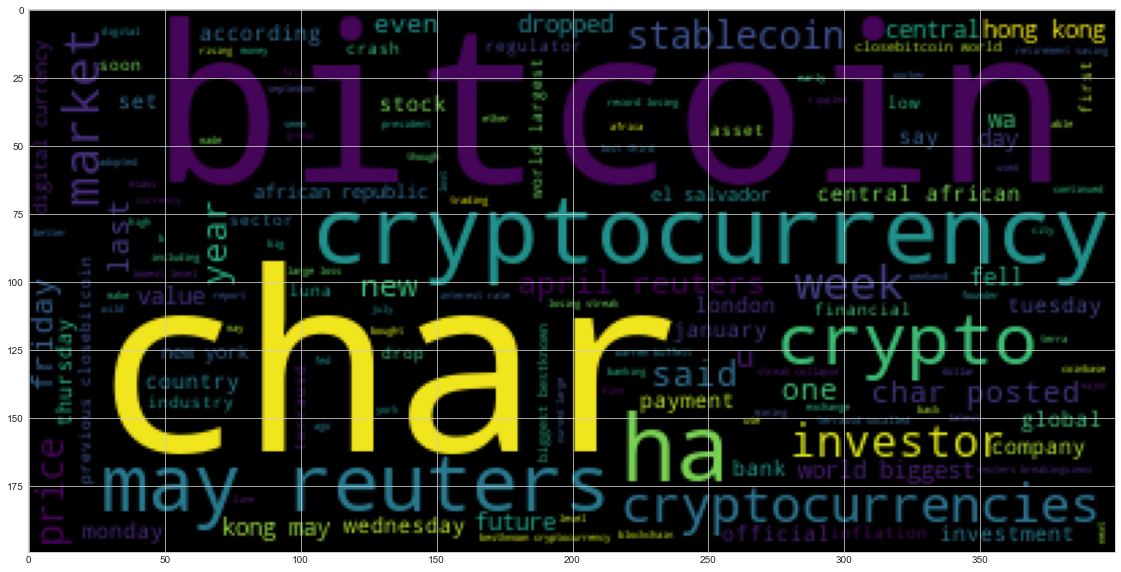

In [247]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(big_string_BTC)
plt.imshow(wc)

In [248]:
# Process text for wordcloud creation - ETH
big_string_ETH = ' '.join(processed_ETH)

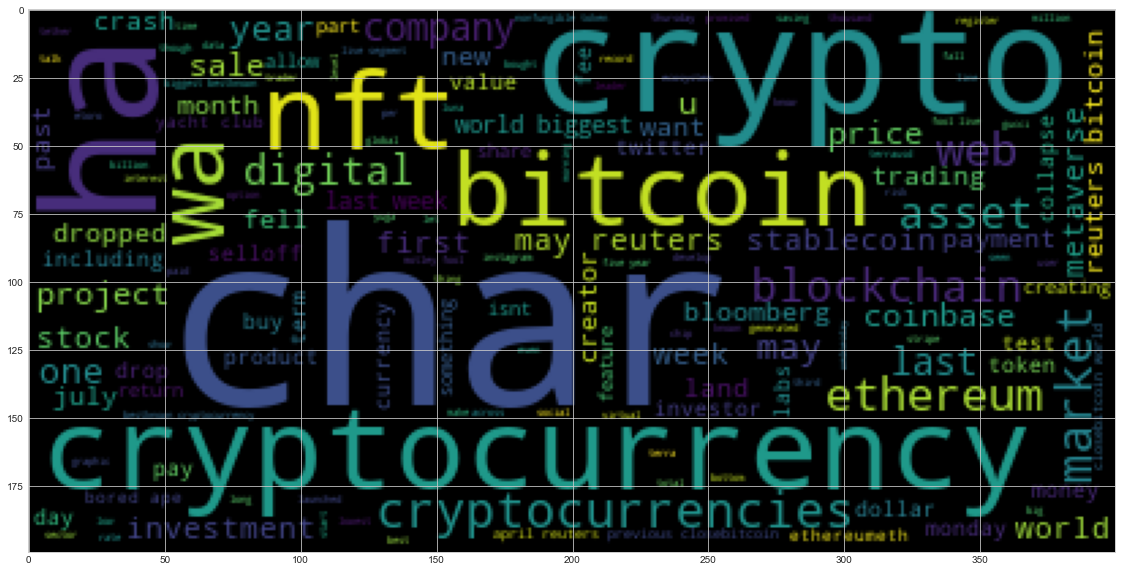

In [249]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(big_string_ETH)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [250]:
import spacy
from spacy import displacy

In [251]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [252]:
# Set article to be analyzed with spaCy
doc_BTC = nlp(big_string_BTC)

In [253]:
# Add a title to the document
doc_BTC.user_data["title"] = "Bitcoin NER"

In [254]:
# Render NER visualization with displacy
displacy.render(doc_BTC, style='ent')

In [255]:
# List all Entities
print([(ent.text,ent.label_) for ent in doc_BTC.ents])

[('texas', 'GPE'), ('april', 'DATE'), ('warren buffett', 'PERSON'), ('weekend', 'DATE'), ('fall weekend', 'DATE'), ('week', 'DATE'), ('fidelity investments', 'ORG'), ('treasury', 'ORG'), ('gucci handbag', 'PERSON'), ('week', 'DATE'), ('reuters', 'ORG'), ('wednesday', 'DATE'), ('wednesday', 'DATE'), ('year', 'DATE'), ('april', 'DATE'), ('tuesday', 'DATE'), ('year', 'DATE'), ('last july', 'DATE'), ('week', 'DATE'), ('last week', 'DATE'), ('monday', 'DATE'), ('mexican', 'NORP'), ('north london week ago', 'DATE'), ('second', 'ORDINAL'), ('el salvador', 'GPE'), ('wednesday', 'DATE'), ('sam', 'PERSON'), ('el salvador', 'GPE'), ('first', 'ORDINAL'), ('september', 'DATE'), ('million', 'CARDINAL'), ('tom scally', 'PERSON'), ('april', 'DATE'), ('african republics', 'ORG'), ('april', 'DATE'), ('wednesday', 'DATE'), ('first', 'ORDINAL'), ('second', 'ORDINAL'), ('south africas', 'GPE'), ('one trillion rand zambias', 'MONEY'), ('mopani', 'NORP'), ('early friday', 'DATE'), ('jack dorsey', 'PERSON'), 

---

### Ethereum NER

In [256]:
# Set article to be analyzed with spaCy
doc_ETH = nlp(big_string_ETH)

In [257]:
# Add a title to the document
doc_ETH.user_data["title"] = "Ethereum NER"

In [258]:
# Render NER visualization with displacy
displacy.render(doc_ETH, style='ent')

In [259]:
# List all Entities
print([(ent.text,ent.label_) for ent in doc_ETH.ents])

[('multibillion dollar', 'MONEY'), ('yuga labs', 'PERSON'), ('april', 'DATE'), ('april', 'DATE'), ('last night', 'TIME'), ('day ago', 'DATE'), ('third', 'ORDINAL'), ('week', 'DATE'), ('reuters', 'ORG'), ('wednesday', 'DATE'), ('year', 'DATE'), ('april', 'DATE'), ('tuesday', 'DATE'), ('year', 'DATE'), ('wednesday', 'DATE'), ('monday', 'DATE'), ('last week', 'DATE'), ('last july', 'DATE'), ('week', 'DATE'), ('last week', 'DATE'), ('monday', 'DATE'), ('july', 'DATE'), ('july', 'DATE'), ('fall weekend', 'DATE'), ('first', 'ORDINAL'), ('april', 'DATE'), ('stripe inc pilot', 'ORG'), ('italian', 'NORP'), ('digital', 'ORG'), ('saturday', 'DATE'), ('month', 'DATE'), ('two', 'CARDINAL'), ('european', 'NORP'), ('north korean', 'NORP'), ('first', 'ORDINAL'), ('hong kong', 'GPE'), ('reuters', 'ORG'), ('january monday', 'DATE'), ('june', 'DATE'), ('one', 'CARDINAL'), ('jack dorsey', 'PERSON'), ('last week', 'DATE'), ('senate', 'ORG'), ('mexico', 'GPE'), ('last five year', 'DATE'), ('november', 'DATE